In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vino.csv')

In [3]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Vamos a ver en que valores se mueven los datos,la escala en la que se encuentran los datos.

In [7]:
nombre_columnas = df.columns

plt.figure(figsize=(20, 10))
plt.boxplot(df.values, 0, 'rD', labels = nombre_columnas)
plt.xticks(rotation = 90)

plt.show()

Vistos estos valores, vamos a tener que reescalar los datos para poder representarlos en un SOM.

In [9]:
scaler=StandardScaler()

scaled_values=scaler.fit_transform(df)
df_norm = df.copy()
df_norm.loc[:,:] = scaled_values

In [10]:
df_norm

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

In [13]:
import simpsom as sps

net=sps.SOMNet(4, 4, df_norm.values)
net.train(start_learning_rate=0.02, epochs = 5000)

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


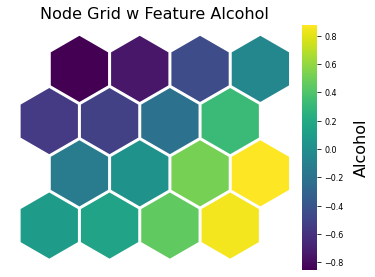

NameError: name 'printout' is not defined

In [23]:
net.nodes_graph(colnum=0, show=True, colname = 'Alcohol', print_out = False)

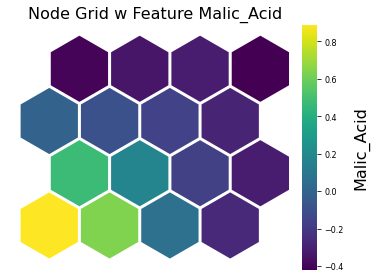

NameError: name 'printout' is not defined

In [15]:
net.nodes_graph(colnum=1, show=True, colname = 'Malic_Acid')

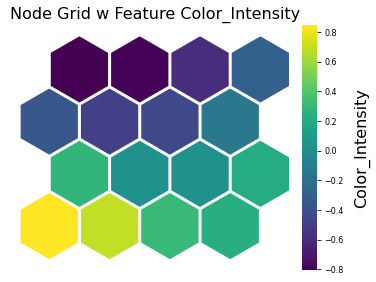

NameError: name 'printout' is not defined

In [16]:
net.nodes_graph(colnum=9, show=True, colname = 'Color_Intensity')

In [17]:
from minisom import MiniSom

In [19]:
som = MiniSom(9, 9, df_norm.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=42)


In [20]:
som.train(df_norm.values, 1000, verbose = True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.4464741150455245


Para tener una idea de qué neuronas del mapa se activan con más frecuencia podemos crear otro diagrama de pseudocolor que refleje las frecuencias de activación:

In [21]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(df_norm.values)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()